# Analysis

* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly,    however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import os
import pandas as pd
from citipy import citipy # get city and country designations based on latitude and longitude
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import json
import requests
import time
import datetime as dt # to put a datestamp on the outputs
# Import api keys
from api_keys import api_key
# Get city and country designations based on latitude and longitude. Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Get today's date  for the file stamp
today = dt.datetime.today().strftime('%Y%m%d')

In [3]:
# Create a csv file as the Output File (CSV)
output_data_file = "output_data/cities.csv"

# specify range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# Create a list to hold the randomly generated list 
coords = []
cities = []

In [5]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
coords = zip(lats, lngs)

In [6]:
# Identify nearest city for each lat, lng combination by accesing citipy depenency
for coord in coords:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
      
    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
print(len(cities))
#print (cities)


770


# Notes
* Latitude is a geographic location which varies from 0 to 90 in the north and 0 to -90 inn the south with equatoer at zero.
* longitude indicates the point's distance east or west from the Prime Meridian in England expressed in radians.They range from -180° when traveling west to 180° when traveling east.
* Coordinates are pairs of latitudes and longitudes on earths suraface that point to different locstions.

# Generate Cities List

# Notes
* In order to make sure the coordinates are actual cities and to avoid duplicates,introducing the if statement for uniques. Generated list of cities are further filtered to avoid duplicates.
* identified a list of unique cities and printed.

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [7]:
# Start a URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# Create a list to store weather data related to each city and name it city_data
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters. Purpose to save cities in group of 50. 
#"i" loops through cities 0 to 50 and record r counts from 1 onwards
#set intial values of the variables to 1 

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list by using this command called enmuerate which uses indexes and starts from 0 
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes. Set i to 0 to 50 and save it as record 0 and loop it 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
# Create endpoint URL with each city. Create a new string object from the given object. 
#If encoding or errors is specified, then the object must expose a data bufferthat will be decoded using the given encoding and error handler.

    city_url = url + "&q=" + city
    print (city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
     # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # get varibales such as  max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=vaini
Processing Record 1 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=carmo do paranaiba
Processing Record 2 of Set 1 | carmo do paranaiba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=albany
Processing Record 3 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=hilo
Processing Record 4 of Set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=dzhusaly
Processing Record 5 of Set 1 | dzhusaly
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=kieta
Processing Record 6 of Set 1 | kieta
http

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=butaritari
Processing Record 3 of Set 2 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=abu samrah
Processing Record 4 of Set 2 | abu samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=sokur
Processing Record 5 of Set 2 | sokur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=cape town
Processing Record 6 of Set 2 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=tual
Processing Record 7 of Set 2 | tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=bluff
Processing Record 8 of Set 2 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2f

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=togur
Processing Record 8 of Set 3 | togur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=wer
Processing Record 9 of Set 3 | wer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=holme
Processing Record 10 of Set 3 | holme
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=caravelas
Processing Record 11 of Set 3 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=zyryanka
Processing Record 12 of Set 3 | zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=wick
Processing Record 13 of Set 3 | wick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=galiwinku

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=padang
Processing Record 11 of Set 4 | padang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=guiratinga
Processing Record 12 of Set 4 | guiratinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=kruisfontein
Processing Record 13 of Set 4 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=saint-philippe
Processing Record 14 of Set 4 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=upernavik
Processing Record 15 of Set 4 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=itaqui
Processing Record 16 of Set 4 | itaqui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=east london
Processing Record 14 of Set 5 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=talnakh
Processing Record 15 of Set 5 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=maykor
Processing Record 16 of Set 5 | maykor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=geraldton
Processing Record 17 of Set 5 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=vestmanna
Processing Record 18 of Set 5 | vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=poya
Processing Record 19 of Set 5 | poya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=gornyy
Processing Record 16 of Set 6 | gornyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=magadi
Processing Record 17 of Set 6 | magadi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=upington
Processing Record 18 of Set 6 | upington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=coihaique
Processing Record 19 of Set 6 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=longyearbyen
Processing Record 20 of Set 6 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=vardo
Processing Record 21 of Set 6 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=anadyr
Processing Record 19 of Set 7 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=yulara
Processing Record 20 of Set 7 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=malpe
Processing Record 21 of Set 7 | malpe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=saldanha
Processing Record 22 of Set 7 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=ancud
Processing Record 23 of Set 7 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=del rio
Processing Record 24 of Set 7 | del rio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=norman wells
Processing Record 21 of Set 8 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=montepuez
Processing Record 22 of Set 8 | montepuez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=nouadhibou
Processing Record 23 of Set 8 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=hambantota
Processing Record 24 of Set 8 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=galle
Processing Record 25 of Set 8 | galle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=banjarmasin
Processing Record 26 of Set 8 | banjarmasin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=sidney
Processing Record 24 of Set 9 | sidney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=thunder bay
Processing Record 25 of Set 9 | thunder bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=dingle
Processing Record 26 of Set 9 | dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=zakamensk
Processing Record 27 of Set 9 | zakamensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=singkang
Processing Record 28 of Set 9 | singkang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=shirokiy
Processing Record 29 of Set 9 | shirokiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=ucluelet
Processing Record 27 of Set 10 | ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=storozhevaya
Processing Record 28 of Set 10 | storozhevaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=galesong
Processing Record 29 of Set 10 | galesong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=mikhaylovka
Processing Record 30 of Set 10 | mikhaylovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=akdepe
Processing Record 31 of Set 10 | akdepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=arona
Processing Record 32 of Set 10 | arona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902f

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=zhezkazgan
Processing Record 30 of Set 11 | zhezkazgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=camacha
Processing Record 31 of Set 11 | camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=flinders
Processing Record 32 of Set 11 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=quinapondan
Processing Record 33 of Set 11 | quinapondan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=comal
Processing Record 34 of Set 11 | comal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=kyra
Processing Record 35 of Set 11 | kyra
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=I

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=sola
Processing Record 32 of Set 12 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=faya
Processing Record 33 of Set 12 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=ayr
Processing Record 34 of Set 12 | ayr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=sibolga
Processing Record 35 of Set 12 | sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=belaya gora
Processing Record 36 of Set 12 | belaya gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=sao paulo de olivenca
Processing Record 37 of Set 12 | sao paulo de olivenca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902f

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=cockburn town
Processing Record 35 of Set 13 | cockburn town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=ambulu
Processing Record 36 of Set 13 | ambulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=yirol
Processing Record 37 of Set 13 | yirol
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=timbo
Processing Record 38 of Set 13 | timbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=eureka
Processing Record 39 of Set 13 | eureka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=helena
Processing Record 40 of Set 13 | helena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=curillo
Processing Record 38 of Set 14 | curillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=mosquera
Processing Record 39 of Set 14 | mosquera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=llanes
Processing Record 40 of Set 14 | llanes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=terney
Processing Record 41 of Set 14 | terney
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=parma
Processing Record 42 of Set 14 | parma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=sile
Processing Record 43 of Set 14 | sile
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=pavilosta
Processing Record 41 of Set 15 | pavilosta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=bourail
Processing Record 42 of Set 15 | bourail
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=praya
Processing Record 43 of Set 15 | praya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=wulanhaote
Processing Record 44 of Set 15 | wulanhaote
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=emilio carranza
Processing Record 45 of Set 15 | emilio carranza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=902fd8ce3c581e31b7de43156a4b2fda&q=kaseda
Processing Record 46 of Set 15 | kaseda
http://api.o

In [8]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
city_frame = pd.DataFrame(city_data)
# Extract relevant fields from the data frame
lats_city = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()
city_frame

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vaini,20,IN,1545627600,61,15.34,74.49,78.80,6.93
1,carmo do paranaiba,68,BR,1545631426,95,-19.00,-46.32,65.45,2.28
2,albany,90,US,1545630720,78,42.65,-73.75,32.00,2.39
3,hilo,90,US,1545627180,90,19.71,-155.08,69.98,4.70
4,kieta,12,PG,1545631427,94,-6.22,155.63,82.86,4.41
5,grand forks,1,US,1545630900,92,47.91,-97.06,12.02,3.36
6,smithers,90,CA,1545630000,92,54.78,-127.17,26.60,10.29
7,bredasdorp,64,ZA,1545627600,77,-34.53,20.04,68.00,1.12
8,rikitea,80,PF,1545631215,100,-23.12,-134.97,78.14,16.37
9,klaksvik,92,FO,1545628800,81,62.23,-6.59,44.60,21.92


In [10]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vaini,20,IN,1545627600,61,15.34,74.49,78.80,6.93
1,carmo do paranaiba,68,BR,1545631426,95,-19.00,-46.32,65.45,2.28
2,albany,90,US,1545630720,78,42.65,-73.75,32.00,2.39
3,hilo,90,US,1545627180,90,19.71,-155.08,69.98,4.70
4,kieta,12,PG,1545631427,94,-6.22,155.63,82.86,4.41


# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
data_df.to_csv('weather_data.csv')
data_df.head()

# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

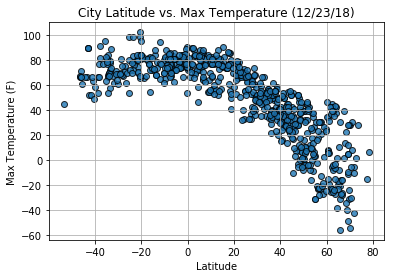

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats_city, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# Latitude vs. Humidity Plot

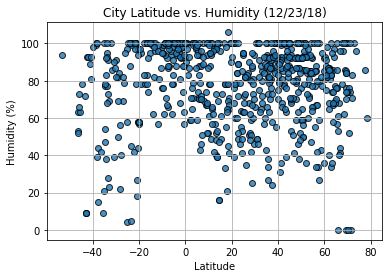

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats_city, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

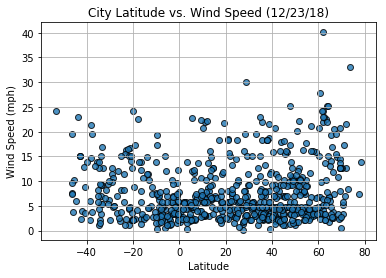

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats_city, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()